## 这是模型自动训练结果可视化程序的jupyter版本  
QIU, 2021  

程序目的：通过jupyter简单操作调用后端python程序运行并将结果在WEB上显示出来。  
程序功能：  
- [X] 可以使用jupyter导入python程序【模型自动训练模块】，加入简单的代码就可以完成整个测试和数据图表输出  
- [ ] 已选中在python模块中加入深度学习模型，并利用AWS的EC2的GPU进行加速计算，得到结果并和传统模型继续结果比较输出  

作者 QIU  
创建日期 2021-02-27  
修改日期 2021-02-27  

In [1]:
import os
if os.getcwd().split('/')[-1]!='workspace':
    os.chdir('/workspace')
!ls

README.md						 models_MSE_sort_1.png
beginner_验证jupyter环境下深度学习模型GPU使用确认.ipynb  models_MSE_summary.png
documents						 requirements.txt
implement_auto_modeling_on_jupyter.ipynb		 src
log							 结论.txt
model_and_record					 要件定義
models_MSE_sort.png


In [2]:
from src import (ANN_model, bo_tpe, optuna_optimizer, baseline, gp_minimize,
                 random_search, basic_config, grid_search, bo_gp,
                 hyper_optimize_main_process)
from src.common import (collection_result_process,
                        save_model_and_result_record, get_logger_instance)
import datetime

# 自动加载修改后的模块
%load_ext autoreload
%autoreload 2

  0%|          | 0/7 [00:00<?, ?it/s]

data shape check: (506, 13) (506,)

-----------------baseline-----------------
 RandomForestRegressor MSE score 29.15393359784446
程序执行时间（秒）:0:00:00.658663
SVR MSE score 77.42951812579332
程序执行时间（秒）:0:00:00.031660
KNN MSE score 81.48773186343571
程序执行时间（秒）:0:00:00.006596


 14%|█▍        | 1/7 [00:03<00:20,  3.50s/it]

ANN MSE score 110.86375697776106
程序执行时间（秒）:0:00:02.791660
                      RandomForestRegressor             SVR  \
description                                                   
baseline_score                    29.153934       77.429518   
baseline_process_time        0:00:00.658663  0:00:00.031660   

                      KNeighborsRegressor             ANN  
description                                                
baseline_score                  81.487732      110.863757  
baseline_process_time      0:00:00.006596  0:00:02.791660  

-----------------grid search hyperOptimize-----------------
{'bootstrap': True, 'criterion': 'mse', 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 20}
RandomForestRegressor MSE score:25.639921597582575
程序执行时间（秒）:0:01:06.575713
最佳超参数值集合: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 20}
SVR MSE score:58.915570407480686
程序执行时间（秒）:0:00:12.569693
最佳

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_and_record/grid_search/ANN/ANN/assets


 29%|██▊       | 2/7 [01:33<04:31, 54.40s/it]

                        RandomForestRegressor                 SVR  \
description                                                         
gridsearch_score           25.639921597582575  58.915570407480686   
gridsearch_process_time        0:01:06.575713      0:00:12.569693   

                        KNeighborsRegressor                 ANN  
description                                                      
gridsearch_score          81.48773186343571  106.57559369018445  
gridsearch_process_time      0:00:00.035816      0:00:09.935284  

-----------------random search hyperOptimize-----------------
RandomForestRegressor MSE score:26.839560904270858
程序执行时间（秒）:0:00:10.034398
最佳超参数值集合: {'criterion': 'mse', 'max_depth': 16, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 94}
SVR MSE score:58.783608874432076
程序执行时间（秒）:0:00:00.769174
最佳超参数值集合: {'C': 43.843178611031625, 'epsilon': 0.03103787277031511, 'kernel': 'poly'}
KNN MSE score:80.74121499347262
程序执行时间（秒）:

ANN MSE score:31.40440983285858
程序执行时间（秒）:0:00:35.223850
最佳超参数值集合: {'activation': 'relu', 'batch_size': 64, 'epochs': 50, 'loss': 'mse', 'neurons': 973}
INFO:tensorflow:Assets written to: model_and_record/random_search/ANN/ANN/assets


 43%|████▎     | 3/7 [02:20<03:24, 51.14s/it]

                          RandomForestRegressor                 SVR  \
description                                                           
randomsearch_score           26.839560904270858  58.783608874432076   
randomsearch_process_time        0:00:10.034398      0:00:00.769174   

                          KNeighborsRegressor                ANN  
description                                                       
randomsearch_score          80.74121499347262  31.40440983285858  
randomsearch_process_time      0:00:00.069517     0:00:35.223850  

-----------------bayesian optimizer with Gaussian Process hyperOptimize-----------------
RandomForestRegressor MSE score:26.099589991106704
程序执行时间（秒）:0:00:31.562582
最佳超参数值集合: OrderedDict([('criterion', 'mae'), ('max_depth', 37), ('max_features', 5), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 100)])
SVR MSE score:58.66693237095876
程序执行时间（秒）:0:00:10.637725
最佳超参数值集合: OrderedDict([('C', 45.1198064092132), ('epsilon', 0.09

ANN MSE score:36.684699132168625
程序执行时间（秒）:0:00:30.418740
最佳超参数值集合: OrderedDict([('activation', 'relu'), ('batch_size', 64), ('epochs', 60), ('loss', 'mse'), ('neurons', 488)])
INFO:tensorflow:Assets written to: model_and_record/BO-GP/ANN/ANN/assets


 57%|█████▋    | 4/7 [03:34<03:00, 60.19s/it]

                RandomForestRegressor                SVR KNeighborsRegressor  \
description                                                                    
bo_score           26.099589991106704  58.66693237095876    80.7723025469514   
bo_process_time        0:00:31.562582     0:00:10.637725      0:00:00.326445   

                                ANN  
description                          
bo_score         36.684699132168625  
bo_process_time      0:00:30.418740  

-----------------Gaussian Process minimize hyperOptimize-----------------
RandomForestRegressor MSE score:26.8104
程序执行时间（秒）:0:00:10.284905
最佳超参数值集合: [100, 42, 8, 11, 6, 'mse']
SVR MSE score:59.9105
程序执行时间（秒）:0:00:03.922642
最佳超参数值集合: [36.04193847030777, 'poly', 0.4546391180000611]


 71%|███████▏  | 5/7 [03:49<01:27, 43.72s/it]

KNN MSE score:80.7412
程序执行时间（秒）:0:00:00.300059
最佳超参数值集合: [13]
                         RandomForestRegressor             SVR  \
description                                                      
gp_minimize_score                    26.810382        59.91052   
gp_minimize_process_time        0:00:10.284905  0:00:03.922642   

                         KNeighborsRegressor  ANN  
description                                        
gp_minimize_score                  80.741215    0  
gp_minimize_process_time      0:00:00.300059    0  

-----------------Bayesian Optimization with Tree-structured Parzen Estimator hyperOptimize-----------------

100%|██████████| 20/20 [00:05<00:00,  3.69trial/s, best loss: 26.586394352703223]
Random Forest MSE score:26.5864
程序执行时间（秒）:0:00:05.422944
最佳超参数值集合: {'criterion': 0, 'max_depth': 14.0, 'max_features': 5.0, 'min_samples_leaf': 5.0, 'min_samples_split': 6.0, 'n_estimators': 83.0}

100%|██████████| 20/20 [00:00<00:00, 48.20trial/s, best loss: 60.6772828078


 30%|███       | 3/10 [00:08<00:20,  2.92s/trial, best loss: 61.881429402971754]WARNING:tensorflow:5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fd8c03cec10> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

 40%|████      | 4/10 [00:11<00:17,  2.90s/trial, best loss: 61.881429402971754]WARNING:tensorflow:5 out of the last 13 calls to <function Model.make_predict_fu


 80%|████████  | 8/10 [00:23<00:06,  3.01s/trial, best loss: 35.91585935394497]WARNING:tensorflow:5 out of the last 12 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fd874248af0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

 90%|█████████ | 9/10 [00:25<00:02,  2.67s/trial, best loss: 35.91585935394497]WARNING:tensorflow:6 out of the last 13 calls to <function Model.make_predict_func

100%|██████████| 50/50 [00:05<00:00,  9.90trial/s, best loss: 2.4542411884501485]
NGBoost MSE score:9.5398
程序执行时间（秒）:0:00:05.210874
最佳超参数值集合: {'Base': DecisionTreeRegressor(criterion='friedman_mse', max_depth=4), 'learning_rate': 0.12381704663149273, 'minibatch_frac': 1.0}
train: 59.88% | validation: 19.96% | test 20.16%

100%|██████████| 50/50 [00:02<00:00, 24.41trial/s, best loss: 12.897920309320071]

 86%|████████▌ | 6/7 [04:31<00:43, 43.30s/it][I 2021-02-27 14:30:01,883] A new study created in memory with name: no-name-f2bc4f2f-b24d-4ad8-969a-de89070841b4



[LightGBM] [Warning] lambda_l1 is set=0.706655754117793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.706655754117793
[LightGBM] [Warning] lambda_l2 is set=0.3576588666329571, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3576588666329571
Training until validation scores don't improve for 2 rounds
Did not meet early stopping. Best iteration is:
[58]	valid_0's l2: 9.40811
LightGBM MSE score:10.2733
程序执行时间（秒）:0:00:02.073445
最佳超参数值集合: {'lambda_l1': 0.706655754117793, 'lambda_l2': 0.3576588666329571, 'learning_rate': 0.168497769034671, 'min_child_samples': 10, 'n_estimators': 58, 'num_leaves': 8}
                    RandomForestRegressor             SVR KNeighborsRegressor  \
description                                                                     
BO-TPE_score                    26.586394       60.677283           80.830052   
BO-TPE_process_time        0:00:05.422944  0:00:00.419604      0:00:00.070864   

                                ANN         NGBo

[I 2021-02-27 14:30:02,437] Trial 0 finished with value: 28.88364130759345 and parameters: {'n_estimators': 75, 'max_depth': 13}. Best is trial 0 with value: 28.88364130759345.
[I 2021-02-27 14:30:02,587] Trial 1 finished with value: 29.11383400208544 and parameters: {'n_estimators': 22, 'max_depth': 20}. Best is trial 0 with value: 28.88364130759345.
[I 2021-02-27 14:30:02,761] Trial 2 finished with value: 61.52571243465021 and parameters: {'n_estimators': 53, 'max_depth': 1}. Best is trial 0 with value: 28.88364130759345.
[I 2021-02-27 14:30:03,215] Trial 3 finished with value: 28.953543240776767 and parameters: {'n_estimators': 67, 'max_depth': 15}. Best is trial 0 with value: 28.88364130759345.
[I 2021-02-27 14:30:03,736] Trial 4 finished with value: 29.484976408371566 and parameters: {'n_estimators': 91, 'max_depth': 8}. Best is trial 0 with value: 28.88364130759345.
[I 2021-02-27 14:30:03,739] A new study created in memory with name: no-name-a614dd75-5c62-4331-9c9b-5a055b7aa7db
[

RandomForestRegressor MSE score:28.8836
程序执行时间（秒）:0:00:00.552464
最佳超参数值集合: {'n_estimators': 75, 'max_depth': 13}


[I 2021-02-27 14:31:44,725] Trial 4 finished with value: 107.70751116781395 and parameters: {'kernel': 'linear', 'C': 28.820640519929427}. Best is trial 2 with value: 62.32747957052339.
[I 2021-02-27 14:31:44,728] A new study created in memory with name: no-name-1fb6e7d0-78d9-46d7-ac82-4f088b3557c5
[I 2021-02-27 14:31:44,738] Trial 0 finished with value: 82.95058196616621 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 82.95058196616621.
[I 2021-02-27 14:31:44,746] Trial 1 finished with value: 81.26511555604914 and parameters: {'n_neighbors': 14}. Best is trial 1 with value: 81.26511555604914.
[I 2021-02-27 14:31:44,754] Trial 2 finished with value: 83.28312749299978 and parameters: {'n_neighbors': 8}. Best is trial 1 with value: 81.26511555604914.
[I 2021-02-27 14:31:44,763] Trial 3 finished with value: 81.91350331680752 and parameters: {'n_neighbors': 11}. Best is trial 1 with value: 81.26511555604914.
[I 2021-02-27 14:31:44,771] Trial 4 finished with value: 81.97311

SVR MSE score:62.3275
程序执行时间（秒）:0:00:00.036143
最佳超参数值集合: {'kernel': 'linear', 'C': 0.00032465255571819643}
KNN MSE score:81.2651
程序执行时间（秒）:0:00:00.007427
最佳超参数值集合: {'n_neighbors': 14}


[I 2021-02-27 14:31:47,764] Trial 0 finished with value: 71.18513235149204 and parameters: {'learning_rate': 0.0016607426904667378, 'batch_size': 128, 'activation': 'relu', 'neurons': 768, 'epochs': 70}. Best is trial 0 with value: 71.18513235149204.


[I 2021-02-27 14:31:52,103] Trial 1 finished with value: 78.42712618825631 and parameters: {'learning_rate': 0.00016623630946741873, 'batch_size': 256, 'activation': 'relu', 'neurons': 2048, 'epochs': 70}. Best is trial 0 with value: 71.18513235149204.


[I 2021-02-27 14:31:54,672] Trial 2 finished with value: 52.3590823562425 and parameters: {'learning_rate': 0.00326057643320209, 'batch_size': 256, 'activation': 'tanh', 'neurons': 1152, 'epochs': 80}. Best is trial 2 with value: 52.3590823562425.


[I 2021-02-27 14:31:57,074] Trial 3 finished with value: 106.84565980070676 and parameters: {'learning_rate': 0.002597590146212153, 'batch_size': 256, 'activation': 'tanh', 'neurons': 1920, 'epochs': 40}. Best is trial 2 with value: 52.3590823562425.


[I 2021-02-27 14:32:00,971] Trial 4 finished with value: 93.14273532316349 and parameters: {'learning_rate': 0.0016943967092669452, 'batch_size': 128, 'activation': 'relu', 'neurons': 1152, 'epochs': 100}. Best is trial 2 with value: 52.3590823562425.


[I 2021-02-27 14:32:04,402] Trial 5 finished with value: 82.18002138825415 and parameters: {'learning_rate': 8.260664802802337e-05, 'batch_size': 256, 'activation': 'relu', 'neurons': 1664, 'epochs': 70}. Best is trial 2 with value: 52.3590823562425.


[I 2021-02-27 14:32:06,644] Trial 6 finished with value: 101.05788160593482 and parameters: {'learning_rate': 0.0004947799300024558, 'batch_size': 256, 'activation': 'relu', 'neurons': 768, 'epochs': 60}. Best is trial 2 with value: 52.3590823562425.


[I 2021-02-27 14:32:11,405] Trial 7 finished with value: 79.38764323125262 and parameters: {'learning_rate': 0.004246744828024375, 'batch_size': 128, 'activation': 'relu', 'neurons': 2048, 'epochs': 90}. Best is trial 2 with value: 52.3590823562425.


[I 2021-02-27 14:32:19,114] Trial 8 finished with value: 30.29318598322755 and parameters: {'learning_rate': 2.8045948959241638e-05, 'batch_size': 128, 'activation': 'tanh', 'neurons': 2048, 'epochs': 100}. Best is trial 8 with value: 30.29318598322755.


[I 2021-02-27 14:32:23,825] Trial 9 finished with value: 58.76197506083366 and parameters: {'learning_rate': 2.115907158855061e-05, 'batch_size': 128, 'activation': 'relu', 'neurons': 1408, 'epochs': 80}. Best is trial 8 with value: 30.29318598322755.


ANN MSE score:30.2932
程序执行时间（秒）:0:00:07.708326
最佳超参数值集合: {'learning_rate': 2.8045948959241638e-05, 'batch_size': 128, 'activation': 'tanh', 'neurons': 2048, 'epochs': 100}
INFO:tensorflow:Assets written to: model_and_record/Optuna/ANN/ANN/assets


[I 2021-02-27 14:32:25,982] A new study created in memory with name: optuna-gbr
[I 2021-02-27 14:32:26,123] Trial 0 finished with value: 97.06037707385828 and parameters: {'subsample': 0.9, 'n_estimators': 98, 'max_depth': 1, 'lr': 0.002065185268024752}. Best is trial 0 with value: 97.06037707385828.
[I 2021-02-27 14:32:26,277] Trial 1 finished with value: 26.766200702042017 and parameters: {'subsample': 0.1, 'n_estimators': 125, 'max_depth': 6, 'lr': 0.02167656963756374}. Best is trial 1 with value: 26.766200702042017.
[I 2021-02-27 14:32:26,414] Trial 2 finished with value: 33.18359223429318 and parameters: {'subsample': 0.30000000000000004, 'n_estimators': 108, 'max_depth': 2, 'lr': 0.02540349763129425}. Best is trial 1 with value: 26.766200702042017.
[I 2021-02-27 14:32:26,673] Trial 3 finished with value: 25.874281736736872 and parameters: {'subsample': 0.2, 'n_estimators': 125, 'max_depth': 13, 'lr': 0.036246074182425154}. Best is trial 3 with value: 25.874281736736872.
[I 2021-0

GradientBoostingRegressor MSE score:25.8743
程序执行时间（秒）:0:00:00.258729
最佳超参数值集合: {'subsample': 0.2, 'n_estimators': 125, 'max_depth': 13, 'lr': 0.036246074182425154}


[I 2021-02-27 14:32:28,194] Trial 0 finished with value: 27.574627171623135 and parameters: {'learning_rate': 0.058685183042510324, 'max_depth': 46, 'n_neighbors': 160}. Best is trial 0 with value: 27.574627171623135.
[I 2021-02-27 14:32:28,982] Trial 1 finished with value: 27.981448241883584 and parameters: {'learning_rate': 0.05927787225508966, 'max_depth': 16, 'n_neighbors': 130}. Best is trial 0 with value: 27.574627171623135.
[I 2021-02-27 14:32:29,241] Trial 2 finished with value: 524.0535418644998 and parameters: {'learning_rate': 0.00028005131097786, 'max_depth': 36, 'n_neighbors': 160}. Best is trial 0 with value: 27.574627171623135.
[I 2021-02-27 14:32:29,864] Trial 3 finished with value: 28.760668504471365 and parameters: {'learning_rate': 0.187960453910339, 'max_depth': 31, 'n_neighbors': 130}. Best is trial 0 with value: 27.574627171623135.
[I 2021-02-27 14:32:30,221] Trial 4 finished with value: 428.83860581360005 and parameters: {'learning_rate': 0.0007054601748310807, '

XGBoost MSE score:27.5746
程序执行时间（秒）:0:00:01.124743
最佳超参数值集合: {'learning_rate': 0.058685183042510324, 'max_depth': 46, 'n_neighbors': 160}
[LightGBM] [Warning] lambda_l1 is set=1.7526434618006078e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7526434618006078e-08
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.00034332359037840673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034332359037840673
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1.7526434618006078e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7526434618006078e-08
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. C

[I 2021-02-27 14:32:31,728] Trial 4 finished with value: 52.014342306329866 and parameters: {'lambda_l1': 4.3351459806160715e-05, 'lambda_l2': 1.0818488082256895e-08, 'num_leaves': 14, 'learning_rate': 0.7493933299965861, 'min_child_samples': 96}. Best is trial 3 with value: 34.69170904242624.
[I 2021-02-27 14:32:31,766] Trial 5 finished with value: 103.40267751536517 and parameters: {'lambda_l1': 0.0008596494065954041, 'lambda_l2': 0.030484702619462633, 'num_leaves': 88, 'learning_rate': 0.0013040829035781732, 'min_child_samples': 94}. Best is trial 3 with value: 34.69170904242624.
[I 2021-02-27 14:32:31,803] Trial 6 finished with value: 65.2044878626513 and parameters: {'lambda_l1': 0.09892092707824339, 'lambda_l2': 2.1465985882155502e-07, 'num_leaves': 29, 'learning_rate': 0.017874208893532154, 'min_child_samples': 98}. Best is trial 3 with value: 34.69170904242624.
[I 2021-02-27 14:32:31,842] Trial 7 finished with value: 101.60963415996723 and parameters: {'lambda_l1': 0.7862079181

[LightGBM] [Warning] lambda_l1 is set=4.3351459806160715e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3351459806160715e-05
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0818488082256895e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0818488082256895e-08
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=4.3351459806160715e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3351459806160715e-05
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_fr

[I 2021-02-27 14:32:31,898] Trial 8 finished with value: 74.30698049332428 and parameters: {'lambda_l1': 0.08520342069509168, 'lambda_l2': 5.2732454162833856e-08, 'num_leaves': 26, 'learning_rate': 0.00481979719721051, 'min_child_samples': 40}. Best is trial 3 with value: 34.69170904242624.
[I 2021-02-27 14:32:31,966] Trial 9 finished with value: 34.866871969763515 and parameters: {'lambda_l1': 1.4594289462827058e-05, 'lambda_l2': 0.0003757973901008414, 'num_leaves': 58, 'learning_rate': 0.7064344697165763, 'min_child_samples': 29}. Best is trial 3 with value: 34.69170904242624.
100%|██████████| 7/7 [07:01<00:00, 60.28s/it]


[LightGBM] [Warning] lambda_l1 is set=1.4594289462827058e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4594289462827058e-05
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.0003757973901008414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003757973901008414
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1.4594289462827058e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4594289462827058e-05
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq

/workspace/src/common/collection_result_process.py:124: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(CHART_TITLE_1, FontProperties=font_set)


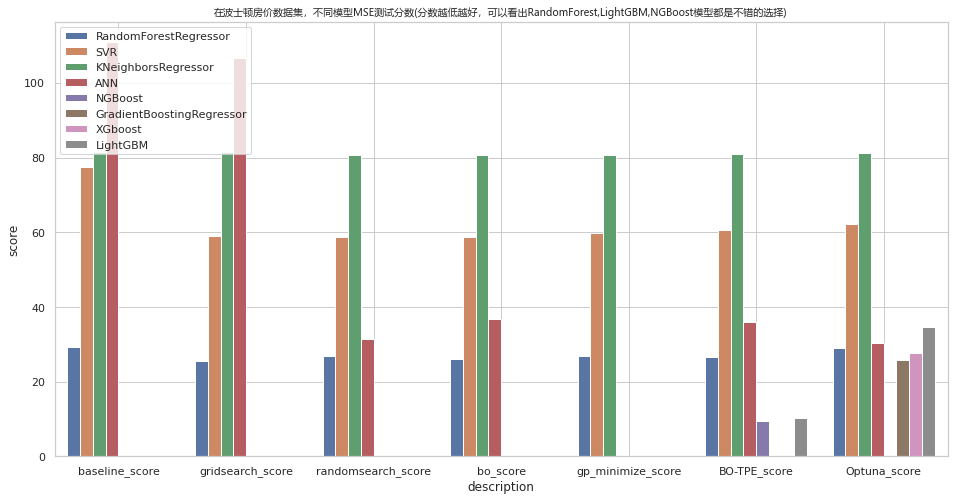

           description       score             model_category
0     gridsearch_score    0.000000                    XGboost
1    gp_minimize_score    0.000000                    NGBoost
2             bo_score    0.000000                    NGBoost
3   randomsearch_score    0.000000                    NGBoost
4     gridsearch_score    0.000000                    NGBoost
5       baseline_score    0.000000                    NGBoost
6       baseline_score    0.000000  GradientBoostingRegressor
7    gp_minimize_score    0.000000                        ANN
8     gridsearch_score    0.000000  GradientBoostingRegressor
9   randomsearch_score    0.000000  GradientBoostingRegressor
10            bo_score    0.000000  GradientBoostingRegressor
11   gp_minimize_score    0.000000  GradientBoostingRegressor
12        BO-TPE_score    0.000000  GradientBoostingRegressor
13      baseline_score    0.000000                    XGboost
14  randomsearch_score    0.000000                    XGboost
15      

/workspace/src/common/collection_result_process.py:147: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(CHART_TITLE_2, FontProperties=font_set)


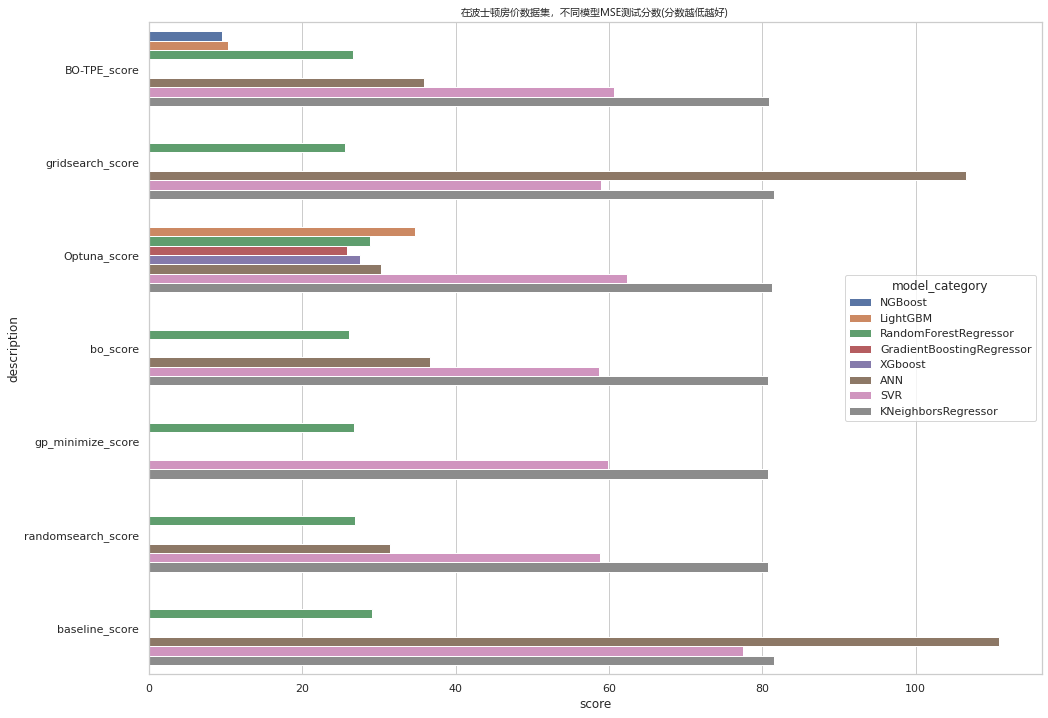

                                          description       score
0                model:NGBoost  HyperOptimizer:BO-TPE    9.539764
1               model:LightGBM  HyperOptimizer:BO-TPE   10.273275
2   model:RandomForestRegressor  HyperOptimizer:gr...   25.639922
3   model:GradientBoostingRegressor  HyperOptimize...   25.874282
4      model:RandomForestRegressor  HyperOptimizer:bo   26.099590
5   model:RandomForestRegressor  HyperOptimizer:BO...   26.586394
6   model:RandomForestRegressor  HyperOptimizer:gp...   26.810382
7   model:RandomForestRegressor  HyperOptimizer:ra...   26.839561
8                model:XGboost  HyperOptimizer:Optuna   27.574627
9   model:RandomForestRegressor  HyperOptimizer:Op...   28.883641
10  model:RandomForestRegressor  HyperOptimizer:ba...   29.153934
11                   model:ANN  HyperOptimizer:Optuna   30.293186
12             model:ANN  HyperOptimizer:randomsearch   31.404410
13              model:LightGBM  HyperOptimizer:Optuna   34.691709
14        

/workspace/src/common/collection_result_process.py:160: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(CHART_TITLE_3, FontProperties=font_set)


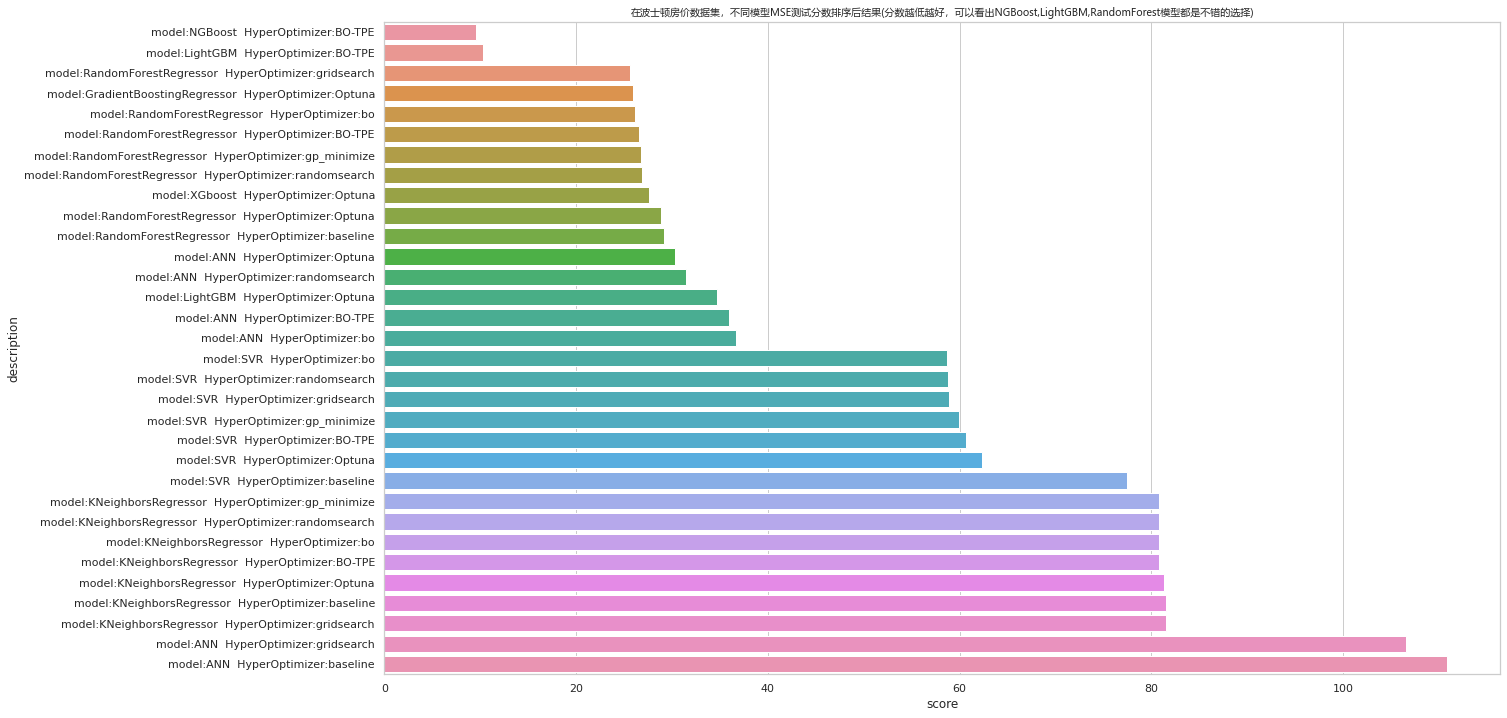

程序执行总时间（秒）:0:07:03.701201
CPU times: user 8min 10s, sys: 24.1 s, total: 8min 34s
Wall time: 7min 3s


In [3]:
%%time
%run src/hyper_optimize_main_process.py